In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
%config InlineBackend.figure_format='retina'
warnings.filterwarnings(action = 'ignore')

In [33]:
#Getting data from the test file for the Iris dataset
testdata_4A = pd.read_csv("test_4A.txt", sep = " ", header = None)
#Dropping all the missing data (if any)
testdata_4A = testdata_4A.dropna(axis = 1, how = 'any')

#Getting data from the test file for the image processing
testdata_4B = pd.read_csv("test_4B.txt", sep = ",",header = None)
#Dropping all the missing data (if any)
testdata_4B = testdata_4B.dropna(axis = 1, how = 'any')

In [34]:
#K-Means Algorithm Implementation 

def kMeansImplementation(X, k):
    difference_between_centroids = 1
    cluster = np.zeros(X.shape[0])
    centroids = X.sample(n = k).values
    while difference_between_centroids:
        distances = cdist(X, centroids ,'cosine')
        cluster = np.array([np.argmin(i) for i in distances])
        new_centroids = pd.DataFrame(X).groupby(by = cluster).mean().values
        if np.count_nonzero(centroids-new_centroids) == 0:
            difference_between_centroids = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [35]:
#Calculating the cluster IDs for the Iris data
k = 3
centroids, cluster = kMeansImplementation(testdata_4A, k)
for i in range(len(cluster)):
    cluster[i] += 1

#Storing the predictions in a .dat file
final_predictions = pd.DataFrame(cluster)
file_name = "PartAPredictions.dat"
final_predictions.to_csv(file_name, header = False, index = False)

In [36]:
#Pre-processing and Dimensinality Reduction of the Image data
testdata_4B_fit = StandardScaler().fit_transform(testdata_4B)
pca_object = PCA(n_components = 72)
pca_result = pca_object.fit_transform(testdata_4B_fit)
tsne_object = TSNE(n_components = 3, verbose = 1, perplexity = 8, n_iter = 250)
tsne_results = tsne_object.fit_transform(pca_result)

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 0.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.970314
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.235886
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435

In [37]:
#Calculating the cluster IDs for the Image data before pre-processing and dimensionality reduction
k = 10
centroids1, cluster1 = kMeansImplementation(testdata_4B, k)
for i in range(len(cluster1)):
    cluster1[i] += 1
    
#Storing the predictions in a .dat file
final_predictions = pd.DataFrame(cluster1)
file_name = "PartBPredictionsBeforeDimensionalityReduction.dat"
final_predictions.to_csv(file_name, header = False, index = False)

In [38]:
#Calculating the cluster IDs for the Image data after pre-processing and dimensionality reduction
X = pd.DataFrame(tsne_results)
k = 10
centroids2, cluster2 = kMeansImplementation(X, k)
for i in range(len(cluster2)):
    cluster2[i] += 1
    
#Storing the predictions in a .dat file
final_predictions = pd.DataFrame(cluster2)
file_name = "PartBPredictionsAfterDimensionalityReduction.dat"
final_predictions.to_csv(file_name, header = False, index = False)

In [39]:
#Calculating the costs using the Sum of Squared Error method
def sumOfSquaredErrors(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += (centroids[int(cluster[i]), 0] - val[0]) ** 2 
    return sum

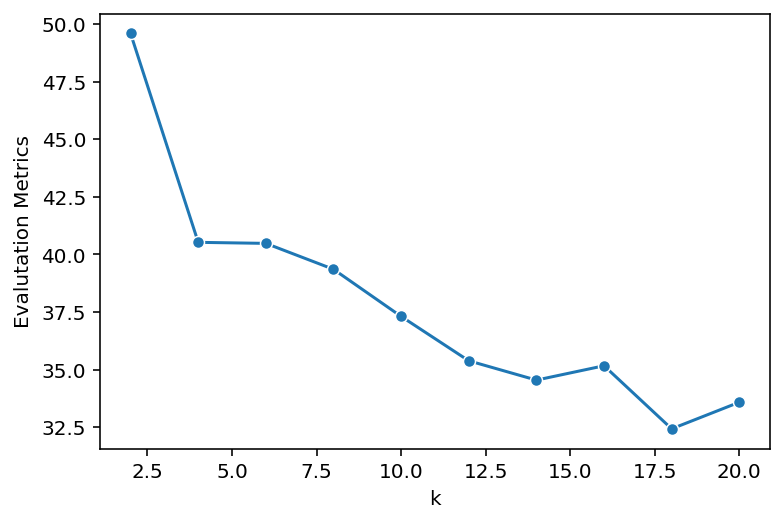

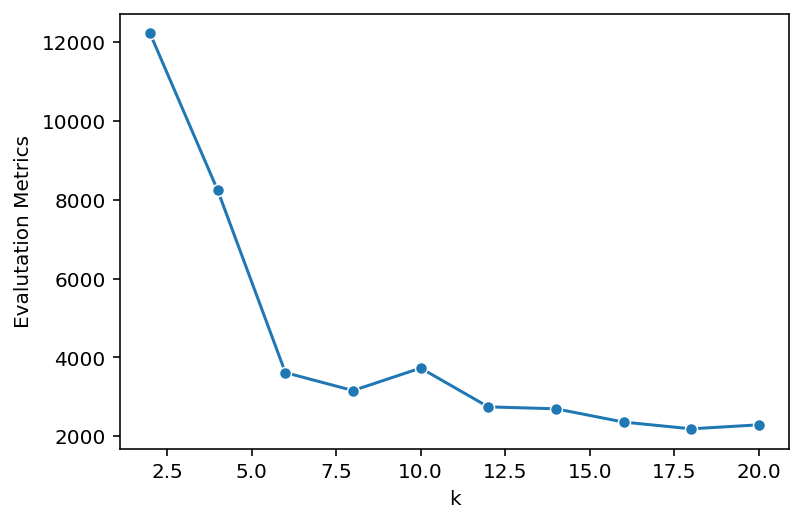

In [43]:
#Plotting the graph (number of clusters vs the evaluation metric)
def graphPlot(X):
    cost_list = []
    V = X.values
    for k in range(2, 21, 2):
        centroids, cluster = kMeansImplementation(X, k)
        cost = sumOfSquaredErrors(V, centroids, cluster)
        cost_list.append(cost)
    sns.lineplot(x = range(2,21, 2), y = cost_list, marker = 'o')
    plt.xlabel('k')
    plt.ylabel('Evalutation Metrics')
    plt.show()
    
#Plotting the graph
graphPlot(testdata_4A)
graphPlot(pd.DataFrame(tsne_results))